# Análisis Exploratorio de Datos para captar diabetes en una persona

En este proyecto usaremos el [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data) para en primer lugar hacer un **análisis exploratorio de datos**, **limpieza** y **normalización** para posteriormente crear un modelo de clasificación multiclase que prediga si una persona padece, puede padecer, o no diabetes según los datos introducidos.

### Importamos el dataset e imprimimos información sobre el mismo

In [1]:
import pandas as pd

df = pd.read_csv('data/diabetes-db.csv')

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Número de filas duplicadas: 23899


Podemos ver que el dataset está bastante limpio, no tiene valores nulos, todas las columnas están en el mismo tipo de dato. Hay 253680 instancias y 22 columnas:

### EXPLICACIÓN DE LAS COLUMNAS Y SUS VALORES ÚNICOS:

1. **"Diabetes_012"** => Es la columna **target** que predice la presencia de diabetes y tiene 3 valores únicos:
   - 0 = no diabetes  
   - 1 = prediabetes  
   - 2 = diabetes  

2. **"HighBP"** => Presión arterial alta:
   - 0 = no tiene presión arterial alta  
   - 1 = sí tiene presión arterial alta  

3. **"HighChol"** => Colesterol alto:
   - 0 = no tiene colesterol alto  
   - 1 = sí tiene colesterol alto  

4. **"CholCheck"** => Se ha hecho una revisión del colesterol en los últimos 5 años:
   - 0 = no se ha hecho revisión  
   - 1 = sí se ha hecho revisión  

5. **"BMI"** => Índice de masa corporal (cálculo con altura y peso):
   - Valor float

6. **"Smoker"** => ¿Ha fumado al menos 5 paquetes de tabaco en su vida?
   - 0 = no ha fumado 5 paquetes  
   - 1 = sí ha fumado al menos 5 paquetes  

7. **"Stroke"** => ¿Ha sufrido un derrame cerebral?
   - 0 = no  
   - 1 = sí  

8. **"HeartDiseaseorAttack"** => ¿Ha tenido enfermedad coronaria (CHD) o infarto de miocardio (MI)?
   - 0 = no ha tenido enfermedad coronaria ni ataque al corazón  
   - 1 = sí ha tenido alguna de las dos condiciones  

9. **"PhysActivity"** => ¿Ha hecho actividad física en los últimos 30 días (excluyendo el trabajo)?
   - 0 = no  
   - 1 = sí  

10. **"Fruits"** => ¿Consume frutas una o más veces al día?
    - 0 = no  
    - 1 = sí  

11. **"Veggies"** => ¿Consume vegetales una o más veces al día?
    - 0 = no  
    - 1 = sí  

12. **"HvyAlcoholConsump"** => ¿Es bebedor excesivo? (más de 14 copas/semana en hombres, más de 7 en mujeres)
    - 0 = no  
    - 1 = sí  

13. **"AnyHealthcare"** => ¿Tiene algún tipo de cobertura médica (seguro, plan prepago, etc.)?
    - 0 = no  
    - 1 = sí  

14. **"NoDocbcCost"** => ¿En los últimos 12 meses necesitó ver a un médico pero no pudo por sus altos costes?
    - 0 = no  
    - 1 = sí  

15. **"GenHlth"** => ¿Cómo califica su salud general?
    - 1 = excelente  
    - 2 = muy buena  
    - 3 = buena  
    - 4 = regular  
    - 5 = mala  

16. **"MentHlth"** => En los últimos 30 días, durante cuántos días su salud mental no fue buena? (estrés, depresión, etc.)
    - Escala de 0 a 30 días

17. **"PhysHlth"** => En los últimos 30 días, durante cuántos días su salud física no fue buena? (enfermedad o lesión)
    - Escala de 0 a 30 días

18. **"DiffWalk"** => ¿Tiene dificultad grave para caminar o subir escaleras?
    - 0 = no  
    - 1 = sí  

19. **"Sex"** => Sexo de la persona:
    - 0 = femenino  
    - 1 = masculino  

20. **"Age"** => Categoría de edad:
    - 1 = 18-24  
    - 2 = 25-29  
    - 3 = 30-34  
    - 4 = 35-39  
    - 5 = 40-44  
    - 6 = 45-49  
    - 7 = 50-54  
    - 8 = 55-59  
    - 9 = 60-64  
    - 10 = 65-69  
    - 11 = 70-74  
    - 12 = 75-79  
    - 13 = 80 o más  

21. **"Education"** => Nivel educativo alcanzado:
    - 1 = Nunca asistió a la escuela o solo jardín  
    - 2 = Grados 1 a 8 (Primaria)  
    - 3 = Grados 9 a 11 (Secundaria incompleta)  
    - 4 = Grado 12 o GED (Secundaria completa)  
    - 5 = Universidad 1 a 3 años (Técnico o incompleta)  
    - 6 = Universidad 4 años o más (Graduado)  

22. **"Income"** => Nivel de ingresos anuales:
    - 1 = Menos de $10,000  
    - 2 = $10,000–14,999  
    - 3 = $15,000–19,999  
    - 4 = $20,000–24,999  
    - 5 = $25,000–34,999  
    - 6 = $35,000–49,999  
    - 7 = $50,000–74,999  
    - 8 = $75,000 o más

Importamos las librerías que necesitaremos y le damos una configuración básica a las gráficas.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)


### 1. Distribución de la variable objetivo

Como sabremos ya, la variable objetivo/target es la columna "Diabetes_012", por lo que procedemos a crear una gráfica para ver su distribución.

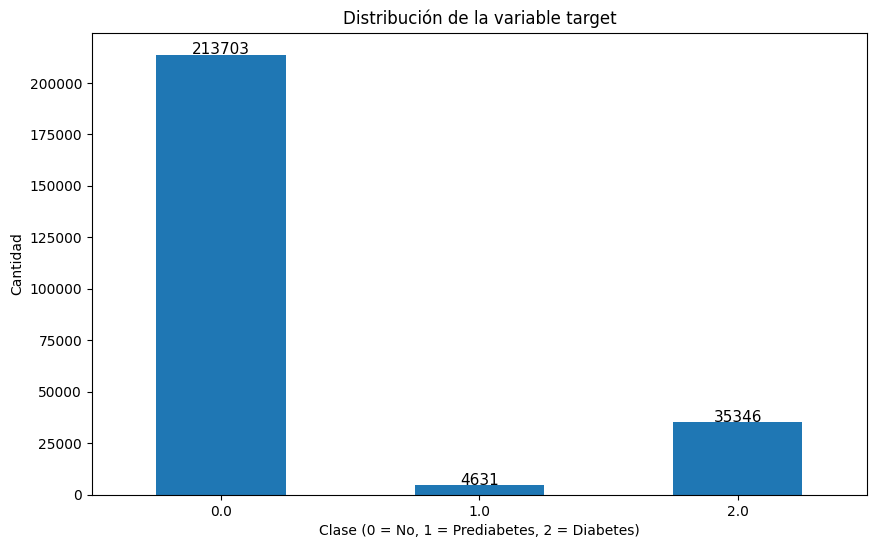

In [6]:
counts = df['Diabetes_012'].value_counts().sort_index()

ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Clase (0 = No, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Cantidad')

# Rotar etiquetas del eje x (por defecto están en vertical si son largas)
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras
for i, v in enumerate(counts):
    ax.text(i, v + 200, str(v), ha='center', fontsize=11)

plt.show()


### 2. Distribución de variables numéricas

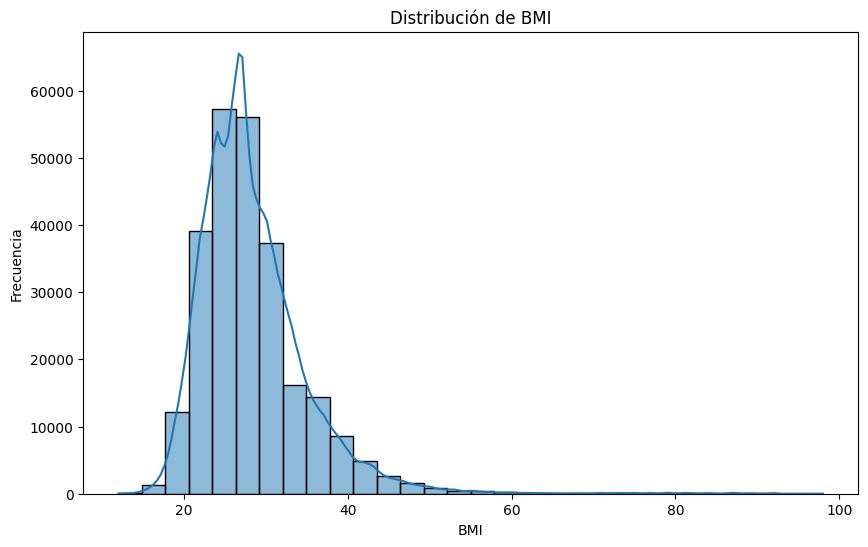

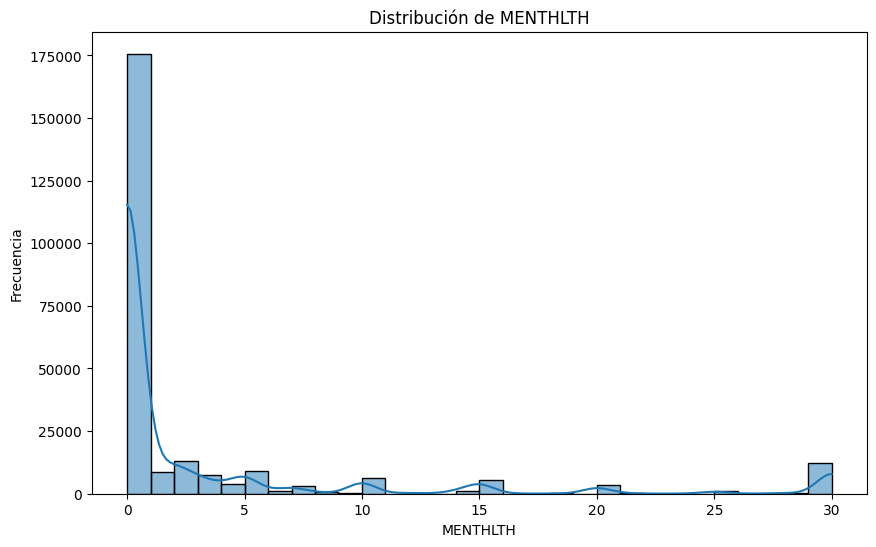

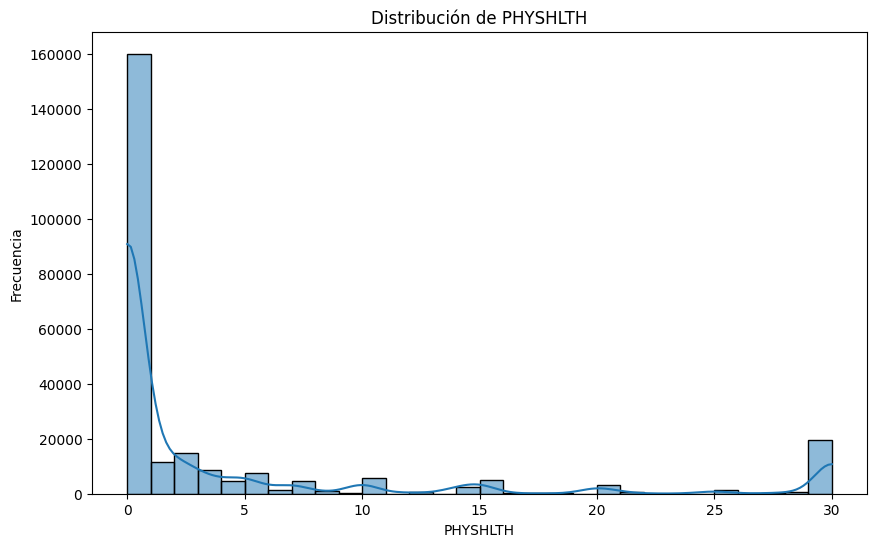

In [7]:

# Histogramas de variables continuas
num_vars = ['BMI', 'MentHlth', 'PhysHlth']
for col in num_vars:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col.upper()}')
    plt.xlabel(col.upper())
    plt.ylabel('Frecuencia')
    plt.show()


### 3. Boxplots para visualizar outliers de las variables numéricas

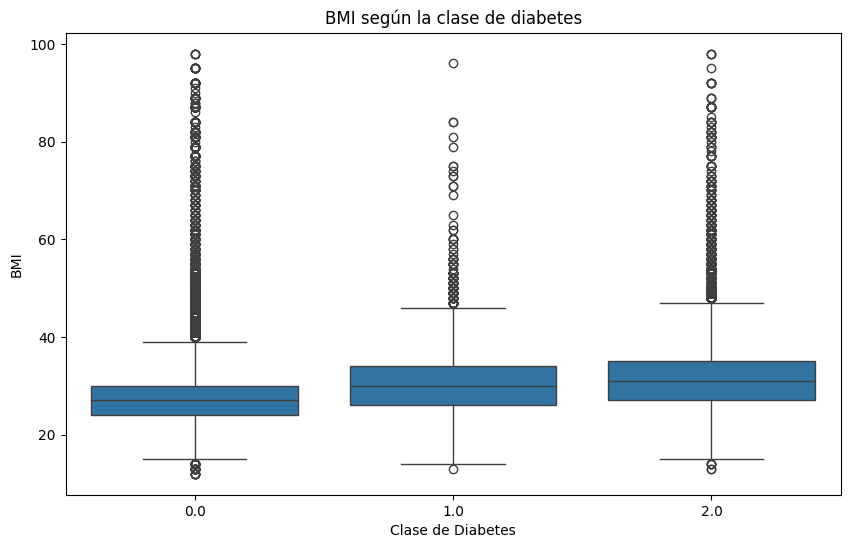

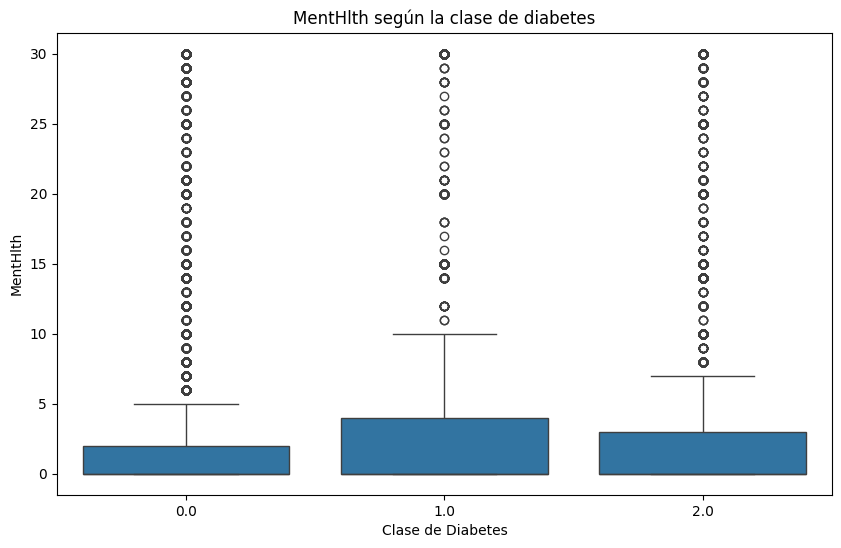

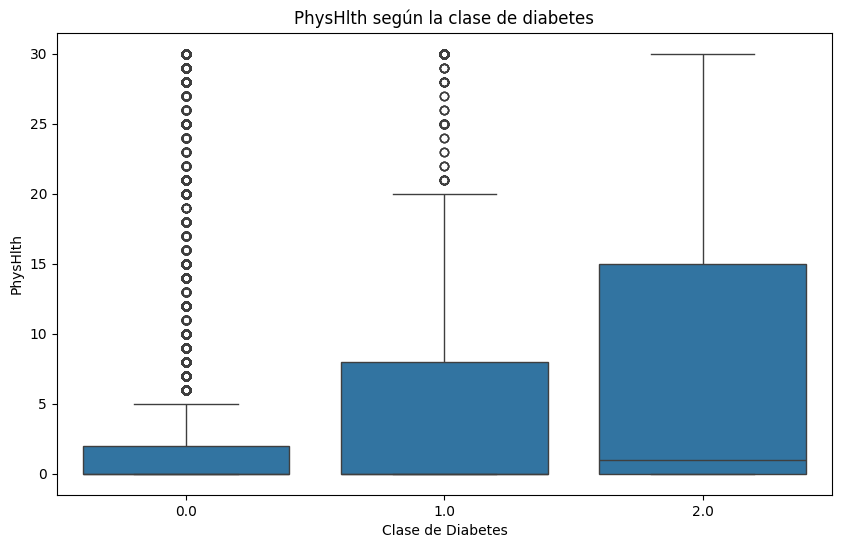

In [8]:
for col in num_vars:
    sns.boxplot(x='Diabetes_012', y=col, data=df)
    plt.title(f'{col} según la clase de diabetes')
    plt.xlabel('Clase de Diabetes')
    plt.ylabel(col)
    plt.show()

### 4. Matriz de correlación

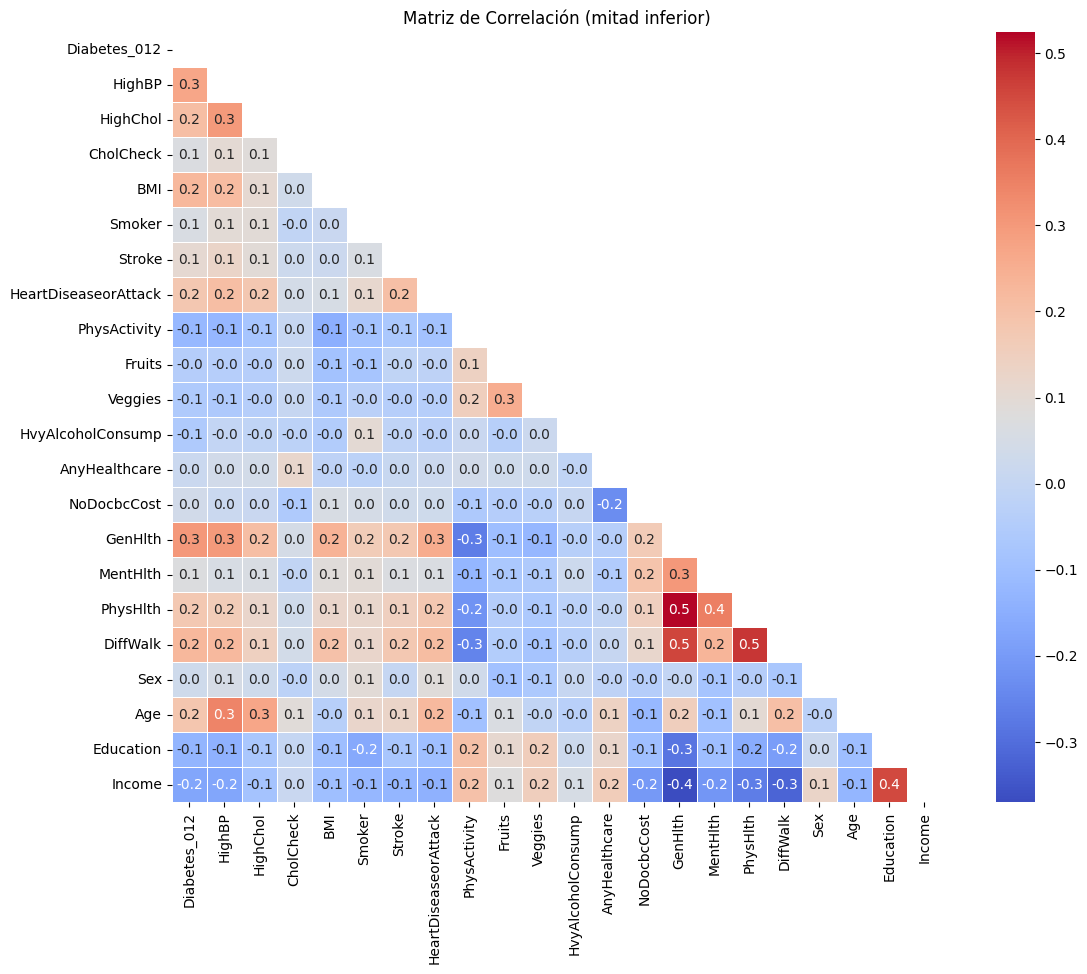

In [9]:
import numpy as np

# Calcular la matriz de correlación
corr = df.corr(numeric_only=True)

# Crear una máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Dibujar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, square=True)
plt.title('Matriz de Correlación (mitad inferior)')
plt.show()


Ya que la correlación entre diabetes_012 y "Sex", "NoDocbcCost", "AnyHealthcare", "Fruits" es casi nulo, (<0.02) procedemos averiguar si realmente no tienen correlación.

### 4. Gráfico para mostrar que realmente no hay mucha correlación de las variables "Sex", "NoDocbcCost", "AnyHealthcare", "Fruits" para decidir qué hacer con ellos

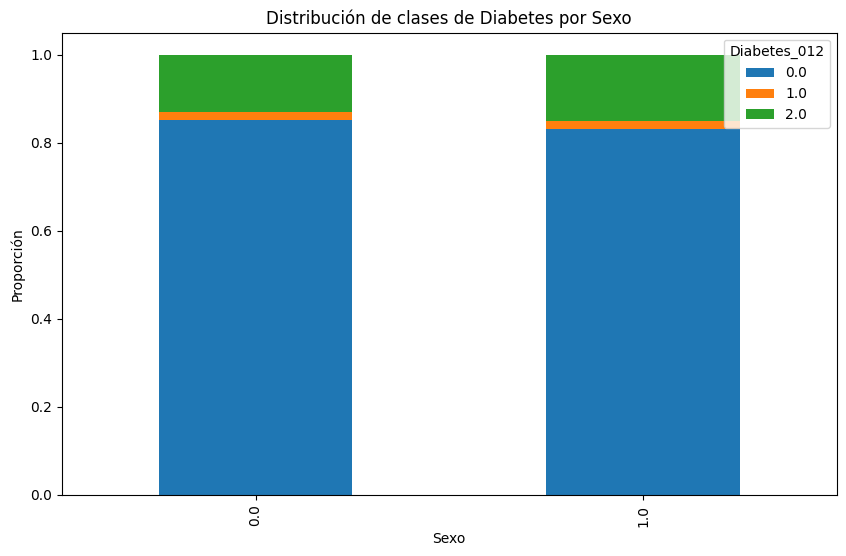

In [10]:
pd.crosstab(df['Sex'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Distribución de clases de Diabetes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Proporción')
plt.legend(title='Diabetes_012', loc='upper right')
plt.show()


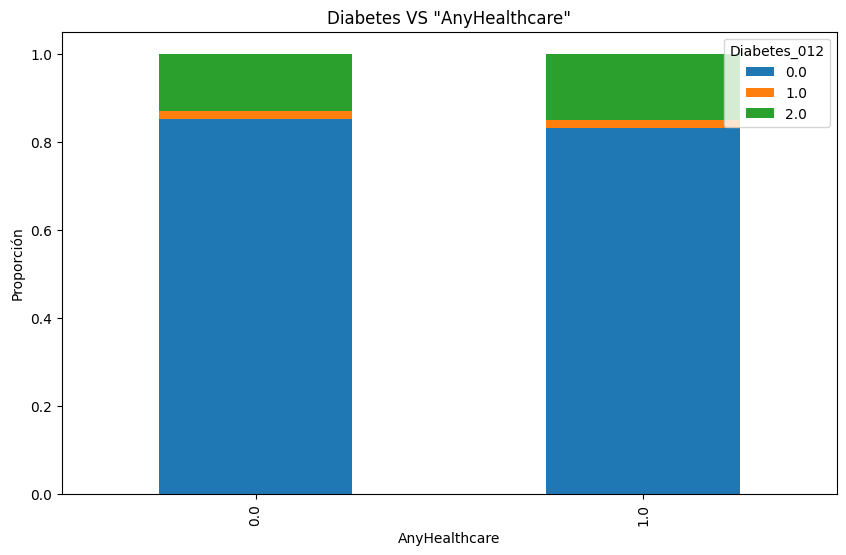

In [11]:
pd.crosstab(df['Sex'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Diabetes VS "AnyHealthcare"')
plt.xlabel('AnyHealthcare')
plt.ylabel('Proporción')
plt.legend(title='Diabetes_012', loc='upper right')
plt.show()


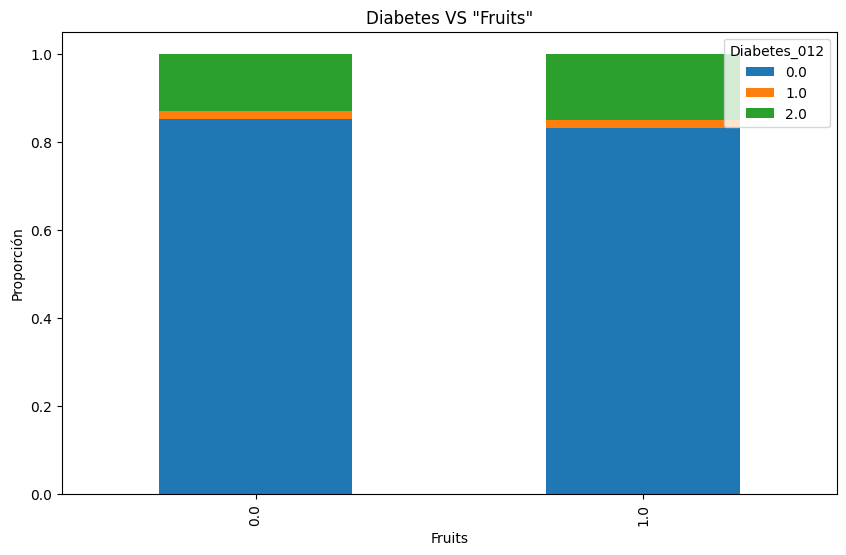

In [12]:
pd.crosstab(df['Sex'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Diabetes VS "Fruits"')
plt.xlabel('Fruits')
plt.ylabel('Proporción')
plt.legend(title='Diabetes_012', loc='upper right')
plt.show()

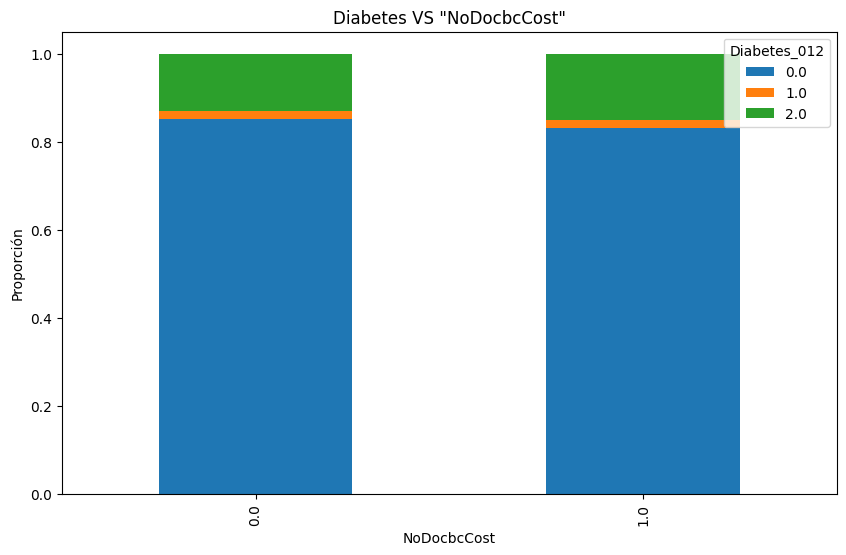

In [13]:
pd.crosstab(df['Sex'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Diabetes VS "NoDocbcCost"')
plt.xlabel('NoDocbcCost')
plt.ylabel('Proporción')
plt.legend(title='Diabetes_012', loc='upper right')
plt.show()

### 5. Analizar las variables que vamos a necesitar normalizar tras los inputs


1. HighBP: necesitaremos 2 inputs, peso y altura, y con estos 2 inputs calcular el BMI con la siguiente fórmula: 

    ```python
    def calcular_bmi_metrico(peso_kg, altura_m):
        return peso_kg / (altura_m ** 2)
    ```
### Conclusión:
El "HighBP" es la única variable que debemos normalizar cuando se pase los inputs en el frontend. 

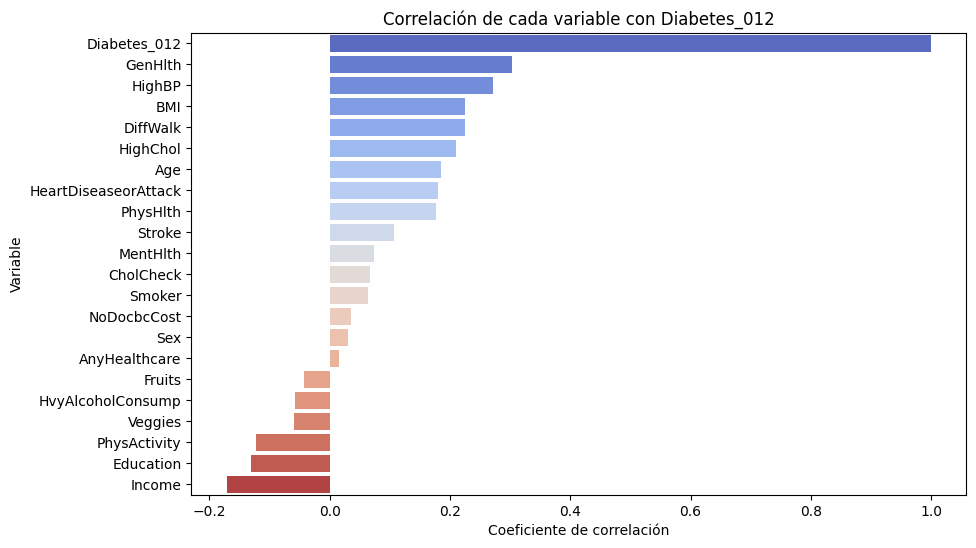

In [14]:
# Seleccionamos las correlaciones de todas las columnas respecto a 'Diabetes_012'
correlaciones_target = df.corr(numeric_only=True)['Diabetes_012'].sort_values(ascending=False)

x=correlaciones_target.values
y=correlaciones_target.index

# Creamos un gráfico de barras
sns.barplot(x=x, y=y, palette='coolwarm', hue=y, legend=False)
plt.title('Correlación de cada variable con Diabetes_012')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variable')
plt.show()

## PREPARACIÓN DEL MODELO

In [15]:
!pip install -q xgboost lightgbm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
🔍 Resultados para: LightGBM
✅ Accuracy: 0.6390137180700095
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9529    0.6467    0.7705     42741
           1     0.0282    0.2527    0.0508       926
           2     0.3383    0.6429    0.4433      7069

    accuracy                         0.6390     50736
   macro avg     0.4398    0.5141    0.4215     50736
weighted avg     0.8504    0.6390    0.7118     50736



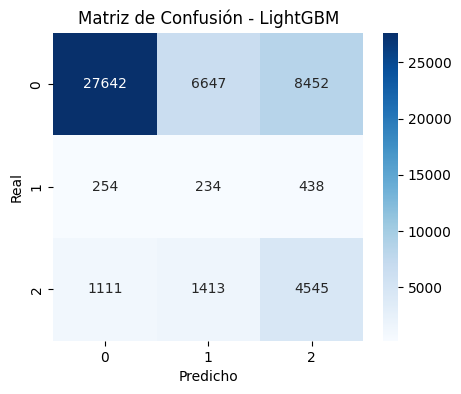

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

# cargamos los datos en sus respectivas variables
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012'].astype(int)

# dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

def evaluar_modelo(modelo, nombre):
    y_pred = modelo.predict(X_test)
    
    print(f"🔍 Resultados para: {nombre}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()
    

# elegimos el modelo LightGBM porque tiene mejores métricas

# LightGBM
from collections import Counter
counter = Counter(y_train)
total = sum(counter.values())
class_weights = {cls: total/count for cls, count in counter.items()}

lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    class_weight=class_weights,
    learning_rate=0.1,
    n_estimators=200,
    random_state=42
)
lgbm.fit(X_train, y_train)
evaluar_modelo(lgbm, "LightGBM")

In [21]:
# Predicciones en entrenamiento
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("✅ Accuracy en entrenamiento:", train_acc)
print("✅ Accuracy en prueba:", test_acc)


print("📋 Classification Report - Entrenamiento:")
print(classification_report(y_train, y_train_pred, digits=4))

print("📋 Classification Report - Prueba:")
print(classification_report(y_test, y_test_pred, digits=4))


# Diferencia
gap = train_acc - test_acc
print(f"🔍 Overfitting (train - test): {gap:.4f}")


✅ Accuracy en entrenamiento: 0.6555059523809523
✅ Accuracy en prueba: 0.6390137180700095
📋 Classification Report - Entrenamiento:
              precision    recall  f1-score   support

           0     0.9616    0.6496    0.7754    170962
           1     0.0732    0.6629    0.1319      3705
           2     0.3621    0.6905    0.4751     28277

    accuracy                         0.6555    202944
   macro avg     0.4656    0.6677    0.4608    202944
weighted avg     0.8618    0.6555    0.7218    202944

📋 Classification Report - Prueba:
              precision    recall  f1-score   support

           0     0.9529    0.6467    0.7705     42741
           1     0.0282    0.2527    0.0508       926
           2     0.3383    0.6429    0.4433      7069

    accuracy                         0.6390     50736
   macro avg     0.4398    0.5141    0.4215     50736
weighted avg     0.8504    0.6390    0.7118     50736

🔍 Overfitting (train - test): 0.0165


In [ ]:
# usando KFold y RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report



# Definimos el modelo base sin hiperparámetros fijos
lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    class_weight=class_weights,
    random_state=42
)

# Espacio de búsqueda de hiperparámetros
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    scoring='f1_macro',
    n_iter=30,
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Entrenamos con búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print(random_search.best_params_)

# Evaluamos el mejor modelo encontrado
mejor_modelo = random_search.best_estimator_

def evaluar_modelo(modelo, nombre):
    print("📦 Evaluando modelo...")
    try:
        y_pred = modelo.predict(X_test)
        print(f"🔍 Resultados para: {nombre} con KFold y RandomizedSearchCV")
        print("✅ Accuracy:", accuracy_score(y_test, y_pred))
        print("📊 Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
    except Exception as e:
        print(f"❌ Error durante la evaluación: {e}")

evaluar_modelo(mejor_modelo, "LightGBM Optimizado")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 21
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 162355, number of used features: 21
[LightGBM] [Info] Start training from score -1.098621
[LightGBM] [Info] Start training from score -1.098617
[LightGBM] [Info] Start training from score -1.098599
[LightGBM] [Info] Start training from score -1.098621
[LightGBM] [Info] Start training from score -1.098617
[LightGBM] [Info] Start tr

In [ ]:
import joblib

joblib.dump(lgbm, 'model/model_lgbm.pkl')

['model/model_lgbm.pkl']